# Manifold Learning - Introduction

## Import & Settings

In [1]:
%matplotlib inline
from pathlib import Path
import pandas as pd
import numpy as np
from numpy.random import choice, randint, uniform, randn
import seaborn as sns
import matplotlib.pyplot as plt
import ipyvolume as ipv
from ipywidgets import HBox
from sklearn.datasets import make_swiss_roll, make_s_curve

In [2]:
pd.options.display.float_format = '{:,.2f}'.format
sns.set_style('whitegrid')

## Manifold Examples

In [3]:
n_points, noise = 1000, 0.1
angles = uniform(low=-np.pi, high=np.pi, size=n_points)
x = 2 * np.cos(angles) + noise * randn(n_points)
y = np.sin(angles) + noise * randn(n_points)

theta = np.pi/4 # 45 degree rotation
rotation_matrix = np.array([[np.cos(theta), -np.sin(theta)], 
                            [np.sin(theta), np.cos(theta)]])

rotated = np.column_stack((x, y)).dot(rotation_matrix)
x, y = rotated[:, 0], rotated[:, 1]

z = .2 * x  + .2 * y + noise * randn(n_points)
data = np.vstack((x, y, z)).T

### Plot 3D Elipse

In [4]:
ipv.quickscatter(*data.T, size=1, marker='sphere', color='blue')

### Non-linear Manifold

In [5]:
n_samples = 10000
palette = sns.color_palette('viridis', n_colors=n_samples)

In [6]:
swiss_X, swiss_val = make_swiss_roll(
    n_samples=n_samples, noise=.1, random_state=42)
swiss_X = swiss_X[swiss_val.argsort()[::-1]]

In [7]:
scurve_X, scurve_val = make_s_curve(
    n_samples=n_samples, noise=.1, random_state=42)
scurve_X = scurve_X[scurve_val.argsort()[::-1]]

### Plot toy examples

In [8]:
HBox([
    ipv.quickscatter(*swiss_X.T, size=1, marker='sphere', color=palette),
    ipv.quickscatter(*scurve_X.T, size=1, marker='sphere', color=palette)
])

### Load Fashion MNIST Data

In [9]:
fashion_mnist = pd.read_csv(Path('data') / 'fashion-mnist_train.csv.gz')
fashion_label = fashion_mnist.label
fashion_data = fashion_mnist.drop('label', axis=1).values
classes = sorted(np.unique(fashion_label).astype(int))

In [10]:
image_size = int(np.sqrt(fashion_data.shape[1])) # 28 x 28 pixels
n_samples = 15

In [21]:
fashion_label[fashion_label == label].index

Int64Index([    3,    10,    13,    24,    31,    41,    44,    80,    92,
              102,
            ...
            59872, 59880, 59889, 59905, 59907, 59934, 59957, 59967, 59980,
            59990],
           dtype='int64', length=6000)

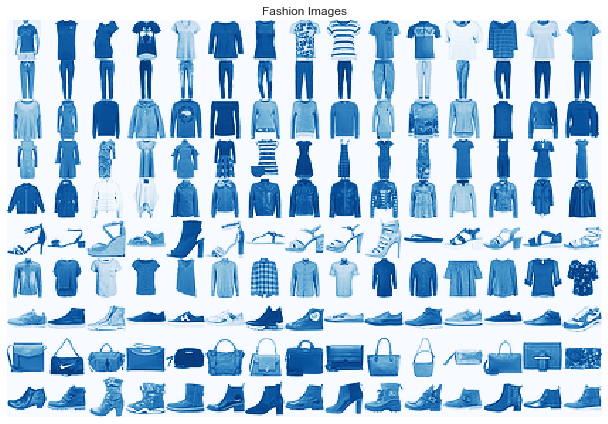

In [23]:
fig, ax = plt.subplots(figsize=(14,6))
fashion_sample = np.empty(shape=(image_size * len(classes),
                               image_size * n_samples))
for row, label in enumerate(classes):
    label_data = fashion_label[fashion_label == label].index
    samples = choice(label_data, size=n_samples, replace=False)
    i = row * image_size
    for col, sample in enumerate(samples):
        j = col * image_size
        fashion_sample[i:i+image_size,
                     j:j + image_size] = fashion_data[sample].reshape(image_size, -1)

ax.imshow(fashion_sample, cmap='Blues')
plt.title('Fashion Images')
plt.axis('off')
plt.tight_layout();

### Pixel structure of random images

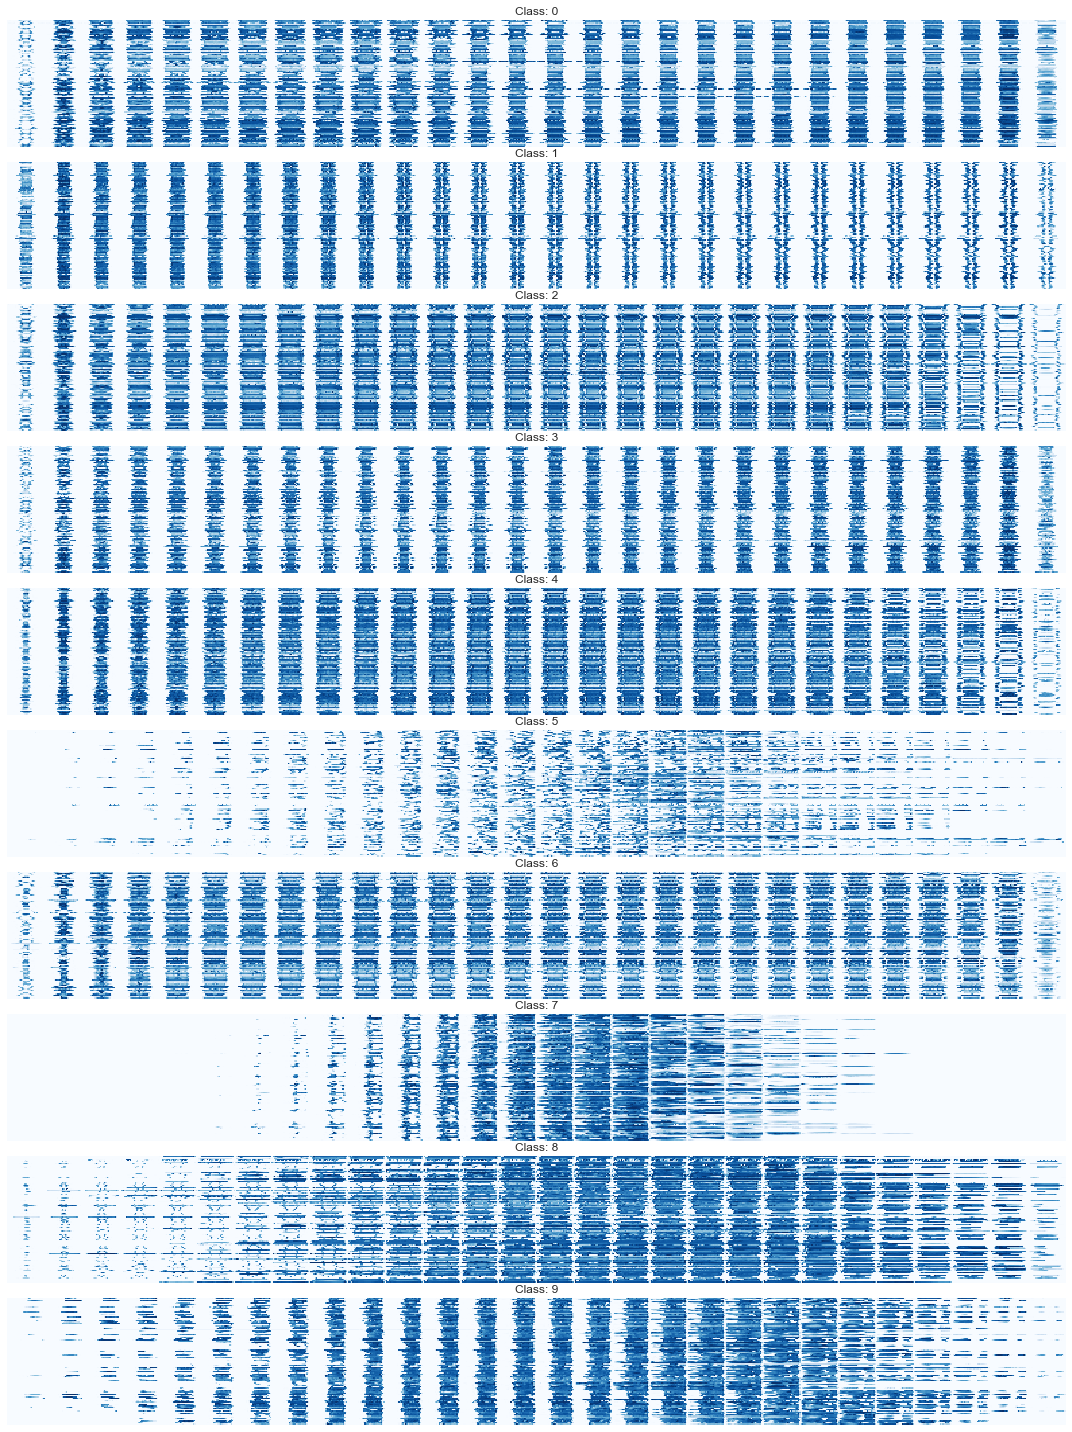

In [25]:
fig, axes = plt.subplots(nrows=len(classes), figsize=(15, 20))
n = 100
samples = []
for i, label in enumerate(classes):
    label_data = fashion_label[fashion_label == label].index
    sample = choice(label_data, size=n, replace=False)
    sns.heatmap(fashion_data[sample], cmap='Blues', ax=axes[i], cbar=False)
    axes[i].set_title('Class: {:.0f}'.format(label))
    axes[i].axis('off')
fig.tight_layout(h_pad=.1);

### Compare with random data

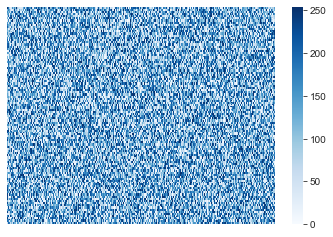

In [26]:
fig, ax = plt.subplots()
sns.heatmap(np.random.randint(low=0, high=255, size=(100, 784)), cmap='Blues', ax=ax)
plt.axis('off');